### Configure the Model

In [6]:
from langchain_groq import ChatGroq
model = ChatGroq(model="llama3-8b-8192")
output = model.invoke("Hi, how are you")
print(output)

content="I'm just a language model, I don't have emotions or feelings like humans do. However, I'm functioning properly and ready to assist you with any questions or tasks you may have! How can I help you today?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 15, 'total_tokens': 61, 'completion_time': 0.083256357, 'prompt_time': 0.003768767, 'queue_time': 0.128422542, 'total_time': 0.087025124}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8b7c3a83f7', 'finish_reason': 'stop', 'logprobs': None} id='run--89544bc3-a6b5-4feb-bf1b-f246941c813b-0' usage_metadata={'input_tokens': 15, 'output_tokens': 46, 'total_tokens': 61}


### Configure the Embeddings

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("HI"))

c:\Users\Anilchoudary R\Gitrepos\langgraph_playground\langgraph_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


384

### Lets take a data embedded and store it in the Vector DB

In [18]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [25]:
## Data Loader
loader=DirectoryLoader("../data",glob="./*.txt", loader_cls=TextLoader)

In [29]:
docs = loader.load()
docs

[Document(metadata={'source': '..\\data\\indian_economy.txt'}, page_content="The economy of India is a developing mixed economy with a notable public sector in strategic sectors.[52] It is the world's fourth-largest economy by nominal GDP and the third-largest by purchasing power parity (PPP); on a per capita income basis, India ranked 136th by GDP (nominal) and 119th by GDP (PPP).[53] From independence in 1947 until 1991, successive governments followed the Soviet model and promoted protectionist economic policies, with extensive Sovietization, state intervention, demand-side economics, natural resources, bureaucrat-driven enterprises and economic regulation. This is characterised as dirigism, in the form of the Licence Raj.[54][55] The end of the Cold War and an acute balance of payments crisis in 1991 led to the adoption of a broad economic liberalisation in India and indicative planning.[56][57] India has about 1,900 public sector companies,[58] with the Indian state having complet

In [31]:
docs[0].page_content

"The economy of India is a developing mixed economy with a notable public sector in strategic sectors.[52] It is the world's fourth-largest economy by nominal GDP and the third-largest by purchasing power parity (PPP); on a per capita income basis, India ranked 136th by GDP (nominal) and 119th by GDP (PPP).[53] From independence in 1947 until 1991, successive governments followed the Soviet model and promoted protectionist economic policies, with extensive Sovietization, state intervention, demand-side economics, natural resources, bureaucrat-driven enterprises and economic regulation. This is characterised as dirigism, in the form of the Licence Raj.[54][55] The end of the Cold War and an acute balance of payments crisis in 1991 led to the adoption of a broad economic liberalisation in India and indicative planning.[56][57] India has about 1,900 public sector companies,[58] with the Indian state having complete control and ownership of railways and highways. The Indian government has 

In [34]:
## Chunking data 
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)


In [37]:
new_docs =text_splitter.split_documents(documents=docs)

In [40]:
new_docs

[Document(metadata={'source': '..\\data\\indian_economy.txt'}, page_content="The economy of India is a developing mixed economy with a notable public sector in strategic sectors.[52] It is the world's fourth-largest economy by nominal GDP and the third-largest by purchasing"),
 Document(metadata={'source': '..\\data\\indian_economy.txt'}, page_content='nominal GDP and the third-largest by purchasing power parity (PPP); on a per capita income basis, India ranked 136th by GDP (nominal) and 119th by GDP (PPP).[53] From independence in 1947 until 1991,'),
 Document(metadata={'source': '..\\data\\indian_economy.txt'}, page_content='(PPP).[53] From independence in 1947 until 1991, successive governments followed the Soviet model and promoted protectionist economic policies, with extensive Sovietization, state intervention,'),
 Document(metadata={'source': '..\\data\\indian_economy.txt'}, page_content='with extensive Sovietization, state intervention, demand-side economics, natural resources,

In [43]:
doc_string = [doc.page_content for doc in new_docs]
doc_string

["The economy of India is a developing mixed economy with a notable public sector in strategic sectors.[52] It is the world's fourth-largest economy by nominal GDP and the third-largest by purchasing",
 'nominal GDP and the third-largest by purchasing power parity (PPP); on a per capita income basis, India ranked 136th by GDP (nominal) and 119th by GDP (PPP).[53] From independence in 1947 until 1991,',
 '(PPP).[53] From independence in 1947 until 1991, successive governments followed the Soviet model and promoted protectionist economic policies, with extensive Sovietization, state intervention,',
 'with extensive Sovietization, state intervention, demand-side economics, natural resources, bureaucrat-driven enterprises and economic regulation. This is characterised as dirigism, in the form of',
 'This is characterised as dirigism, in the form of the Licence Raj.[54][55] The end of the Cold War and an acute balance of payments crisis in 1991 led to the adoption of a broad economic',
 'in

In [44]:
len(doc_string)

27

In [47]:
db=Chroma.from_documents(new_docs, embeddings)

In [54]:
retriever = db.as_retriever(search_kwargs={"k":3})

In [55]:
retriever.invoke("what is industrial growth of India")

[Document(metadata={'source': '..\\data\\indian_economy.txt'}, page_content='in the world.[82][83][84][85][86] Economists say that due to structural economic problems, India is experiencing jobless economic growth.[87]'),
 Document(metadata={'source': '..\\data\\indian_economy.txt'}, page_content='in the world.[82][83][84][85][86] Economists say that due to structural economic problems, India is experiencing jobless economic growth.[87]'),
 Document(metadata={'source': '..\\data\\indian_economy.txt'}, page_content='The service sector makes up more than 50% of GDP and remains the fastest growing sector, while the industrial sector and the agricultural sector employs a majority of the labor force.[92] The Bombay')]

### LangGraph workflow

### 1. Creation of pydantic class

In [84]:
from pydantic import BaseModel, Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
import operator

class TopicSelectionParser(BaseModel):
    Topic: str = Field(description="selected topic")
    Reasoning : str = Field(description="Reasoning behind the topic selection")

In [85]:
from langchain.output_parsers import PydanticOutputParser

In [86]:
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [87]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind the topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [123]:
class AgentState(TypedDict):
    messages:  Annotated[Sequence[BaseMessage], operator.add]

In [124]:
def function_1(state:AgentState):
    pass


In [125]:
def function_2(state:AgentState):
    pass


In [126]:
def function_3(state:AgentState):
    pass


In [127]:
def router(state:AgentState):
    pass

In [128]:
from langgraph.graph import StateGraph, END

In [129]:
workflow = StateGraph(AgentState)

In [130]:
workflow.add_node("Supervisor", function_1)

In [132]:
workflow.add_node("RAG", function_2)

In [131]:
workflow.add_node("LLM", function_3)

In [133]:
workflow.set_entry_point("Supervisor")

In [135]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM"
    }
)

In [136]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM", END)

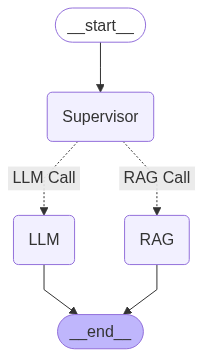

In [137]:
workflow.compile()